In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

/tmp/ipykernel_2206278/2191228972.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [54]:
with open('Documents/pyro_models/files_to_run/results/param_recover_no_mean_u.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [55]:
# get the real and inferred params from more agents
real_params = []
inferred_params = []
real_params = pos_dict['real_param']
inferred_params = pos_dict['inferred_param']['m_locs']

In [ ]:
# get the old parameter recovery results
real_params = []
inferred_params = []
for i in pos_dict.keys():
    real_params.append(pos_dict[i]['params'])
    inferred_params.append(pos_dict[i]['m_locs'])

real_params = np.array(real_params)
inferred_params = np.array(inferred_params)
inferred_params = inferred_params.reshape(100,4)

In [6]:
print(real_params.shape)
print(inferred_params.shape)

(100, 4)
(100, 4)


In [56]:
# real_mean_u = real_params[:,0]
# inferred_mean_u = inferred_params[:,0]

# real_shift_mean_u = real_params[:,1]
# inferred_shift_mean_u = inferred_params[:,4]

# real_sigma_u = real_params[:,2]
# inferred_sigma_u = inferred_params[:,1]

# real_shift_sigma_u = real_params[:,3]
# inferred_shift_sigma_u = inferred_params[:,5]

# real_sigma_es = real_params[:,4]
# inferred_sigma_es = inferred_params[:,2]

# real_shift_sigma_es = real_params[:,5]
# inferred_shift_sigma_es = inferred_params[:,6]

# real_beta = real_params[:,6]
# inferred_beta = inferred_params[:,3]

# real_mean_u = real_params[:,0]
# inferred_mean_u = inferred_params[:,0]
real_sigma_u = real_params[:,0]
inferred_sigma_u = inferred_params[:,0]
# real_sigma_es = np.exp(real_params[:,2])
# inferred_sigma_es = np.exp(inferred_params[:,2])
real_a = real_params[:,1]
inferred_a = inferred_params[:,1]
real_b = real_params[:,2]
inferred_b = inferred_params[:,2]
# real_c = real_params[:,4]
# inferred_c = inferred_params[:,4]
real_beta = real_params[:,3]
inferred_beta = inferred_params[:,3]

# real_mean_u = real_params[:,0]
# inferred_mean_u = inferred_params[:,0]
# real_sigma_u = np.exp(real_params[:,1])
# inferred_sigma_u = np.exp(inferred_params[:,1])
# real_sigma_es = np.exp(real_params[:,2])
# inferred_sigma_es = np.exp(inferred_params[:,2])
# real_a = np.exp(real_params[:,3])
# inferred_a = np.exp(inferred_params[:,3])
# real_b = np.exp(real_params[:,4])
# inferred_b = np.exp(inferred_params[:,4])
# real_c = np.exp(real_params[:,5])
# inferred_c = np.exp(inferred_params[:,5])
# real_beta = np.exp(real_params[:,6])
# inferred_beta = np.exp(inferred_params[:,6])

In [5]:
def same_range(ax, x, y):
    # Calculate the maximum range between x and y
    list = np.concatenate((x,y))

    max_range = max(list) - min(list)

    # Calculate the center of the plot
    center = (max(list) + min(list)) / 2

    # Set the limits of both axes with the same range around the center
    small = center - max_range / 1.7
    big = center + max_range / 1.7
    ax.set_xlim(small, big)
    ax.set_ylim(small, big)

    # ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Diagonal Line')

In [57]:
# put everything to lists so it is easier to plot
real_list = [real_sigma_u, real_a, real_b, real_beta]
inferred_list = [inferred_sigma_u,  inferred_a, inferred_b, inferred_beta]

# try dataframe instead
df = pd.DataFrame({
    # 'real_mean_u': real_mean_u,
    'real_sigma_u': real_sigma_u,
    'real_a': real_a,
    'real_b': real_b,
    # 'real_c': real_c,
    'real_beta': real_beta,
    # 'inferred_mean_u': inferred_mean_u,
    'inferred_sigma_u': inferred_sigma_u,
    'inferred_a': inferred_a,
    'inferred_b': inferred_b,
    # 'inferred_c': inferred_c,
    'inferred_beta': inferred_beta
})

In [58]:
name_list = ['real_sigma_u','inferred_sigma_u', 'real_a','inferred_a','real_b','inferred_b', 'real_beta','inferred_beta']

In [97]:
df['real_mean_u']

0     0.862863
1     0.594595
2    -0.510511
3     0.686687
4     1.871872
        ...   
95   -1.335335
96   -0.766767
97    1.167167
98   -0.642643
99   -1.871872
Name: real_mean_u, Length: 100, dtype: float64

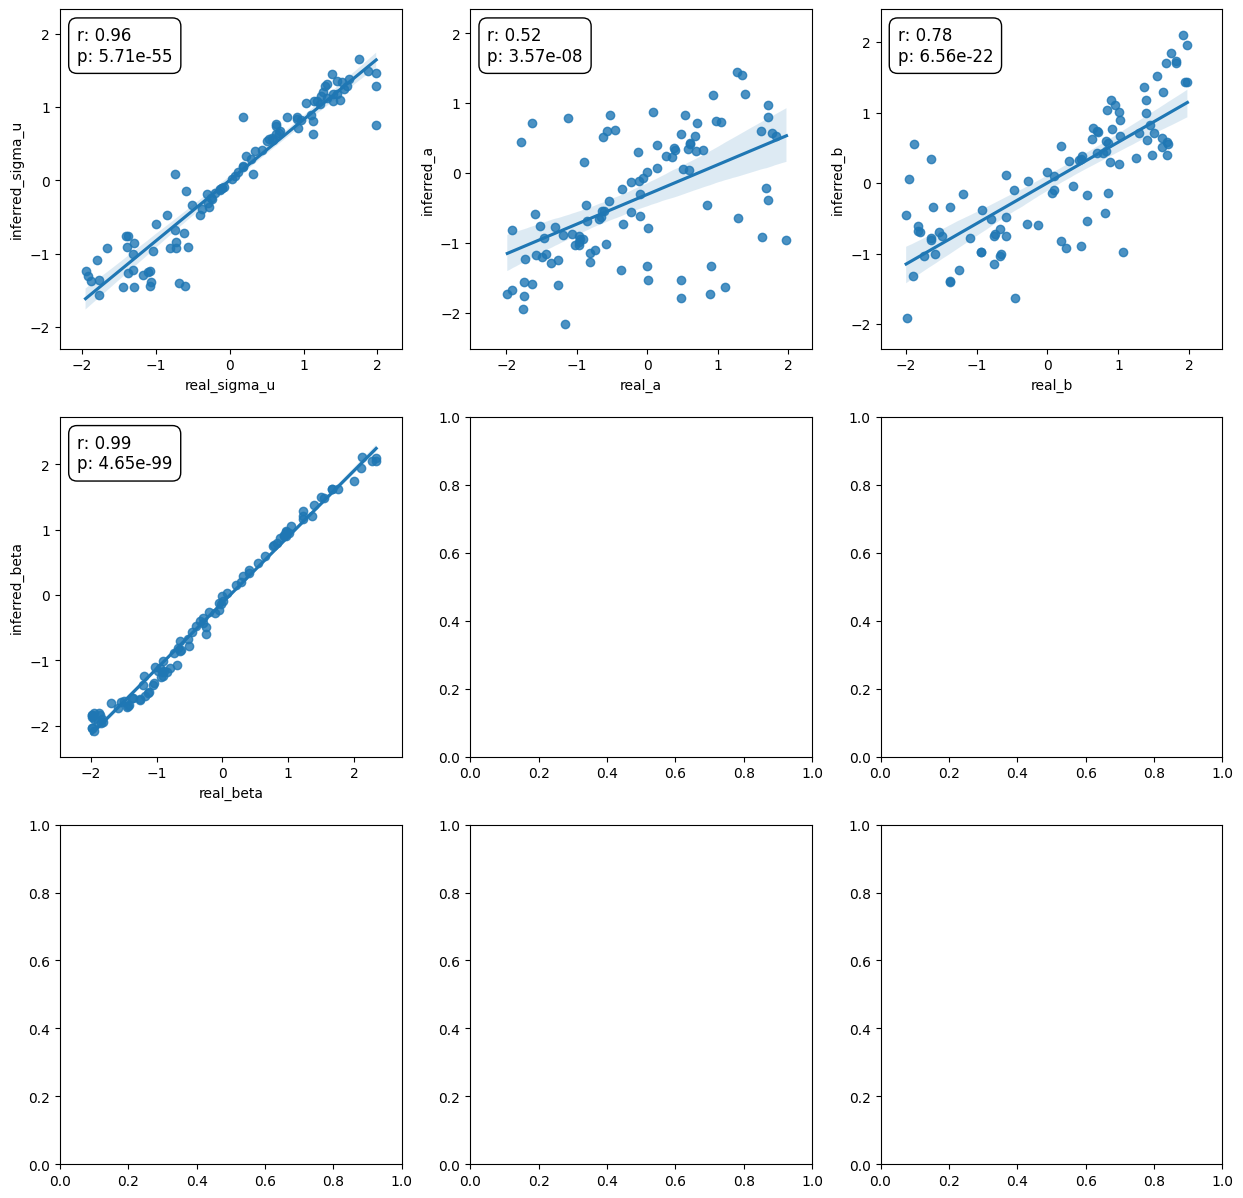

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sub_x = 0
sub_y = 0
for i in range(len(real_list)):
    x_name = name_list[i*2]
    y_name = name_list[i*2+1]
    temp_ax = axes[sub_x, sub_y]
    sns.regplot(ax=temp_ax, x=x_name, y=y_name, data=df)
    same_range(temp_ax, df[x_name], df[y_name])
    corr_coeff, p_value = pearsonr(df[x_name], df[y_name])

    axes[sub_x, sub_y].annotate(f'r: {corr_coeff:.2f}\np: {p_value:.2e}', xy=(0.05, 0.95), xycoords='axes fraction', 
                fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
    
    if sub_y == 2:
        sub_x = sub_x + 1
        sub_y = 0
    else:
        sub_y = sub_y + 1




plt.show()
plt.close()

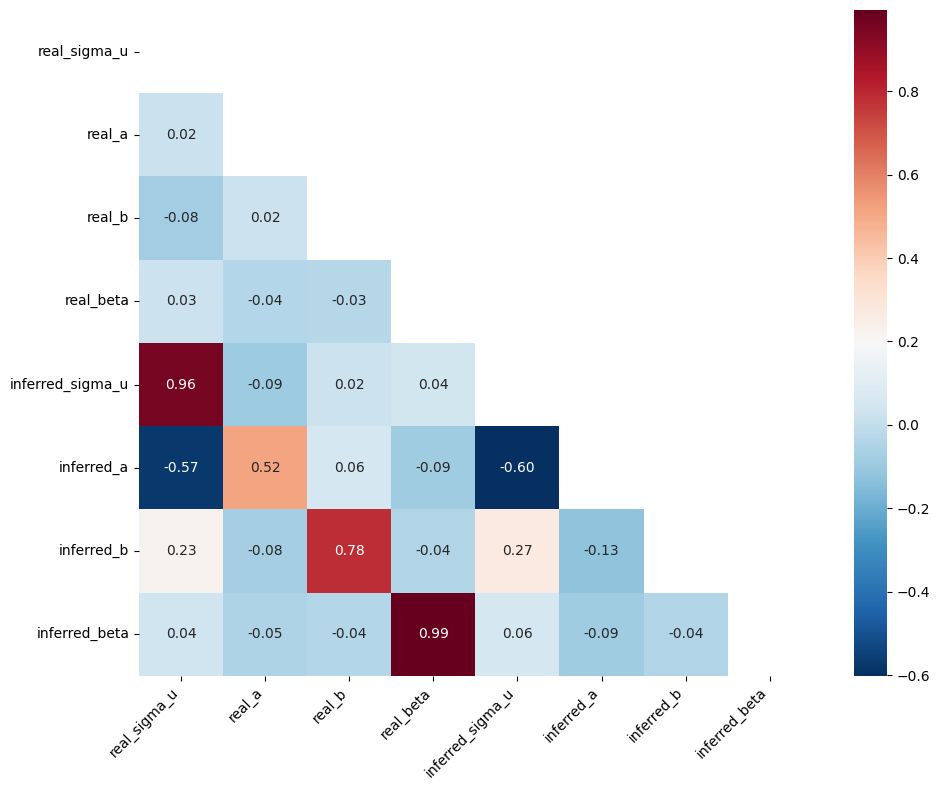

In [60]:
# -----------------------------correlation--------------------------------------
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, mask=mask, fmt=".2f", cmap='RdBu_r', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# plot the posterior with simulated data
# fig = plt.figure(constrained_layout=False, figsize=(12,6))
# gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)

# ------------------------------shift model-------------------------------------------------
# ax1 = fig.add_subplot(gs[0,0], xlabel = 'real_mean_u', ylabel = 'infered_mean_u')
# ax2 = fig.add_subplot(gs[0,1], xlabel = 'real_sigma_u', ylabel = 'infered_sigma_u')
# ax3 = fig.add_subplot(gs[0,2], xlabel = 'real_sigma_es', ylabel = 'infered_sigma_es')
# ax4 = fig.add_subplot(gs[0,3], xlabel = 'real_beta', ylabel = 'infered_beta')
# ax5 = fig.add_subplot(gs[1,0], xlabel = 'real_shift_mean_u', ylabel = 'infered_shift_mean_sigma_u')
# ax6 = fig.add_subplot(gs[1,1], xlabel = 'real_shift_sigma_u', ylabel = 'infered_shift_sigma_u')
# ax7 = fig.add_subplot(gs[1,2], xlabel = 'real_shift_sigma_es', ylabel = 'infered_shift_sigma_es')

# ax1.scatter(real_mean_u, inferred_mean_u)
# ax2.scatter(real_sigma_u, inferred_sigma_u)
# ax3.scatter(real_sigma_es, inferred_sigma_es)
# ax4.scatter(real_beta, inferred_beta)
# ax5.scatter(real_shift_mean_u, inferred_shift_mean_u)
# ax6.scatter(real_shift_sigma_u, inferred_shift_sigma_u)
# ax7.scatter(real_shift_sigma_es, inferred_shift_sigma_es)

# same_range(ax1, real_mean_u, inferred_mean_u)
# same_range(ax2, real_sigma_u, inferred_sigma_u)
# same_range(ax3, real_sigma_es, inferred_sigma_es)
# same_range(ax4, real_beta, inferred_beta)
# same_range(ax5, real_shift_mean_u, inferred_shift_mean_u)
# same_range(ax6, real_shift_sigma_u, inferred_shift_sigma_u)
# same_range(ax7, real_shift_sigma_es, inferred_shift_sigma_es)

# ----------------------------time perception model-------------------------------------
# axes = []
# axes.append(fig.add_subplot(gs[0,0], xlabel = 'real_mean_u', ylabel = 'infered_mean_u'))
# axes.append(fig.add_subplot(gs[0,1], xlabel = 'real_sigma_u', ylabel = 'infered_sigma_u'))
# # axes.append(fig.add_subplot(gs[0,2], xlabel = 'real_sigma_es', ylabel = 'infered_sigma_es'))
# axes.append(fig.add_subplot(gs[0,3], xlabel = 'real_a', ylabel = 'infered_a'))
# axes.append(fig.add_subplot(gs[1,0], xlabel = 'real_b', ylabel = 'infered_b'))
# # axes.append(fig.add_subplot(gs[1,1], xlabel = 'real_c', ylabel = 'infered_c'))
# axes.append(fig.add_subplot(gs[1,2], xlabel = 'real_beta', ylabel = 'infered_beta'))


<Figure size 640x480 with 0 Axes>

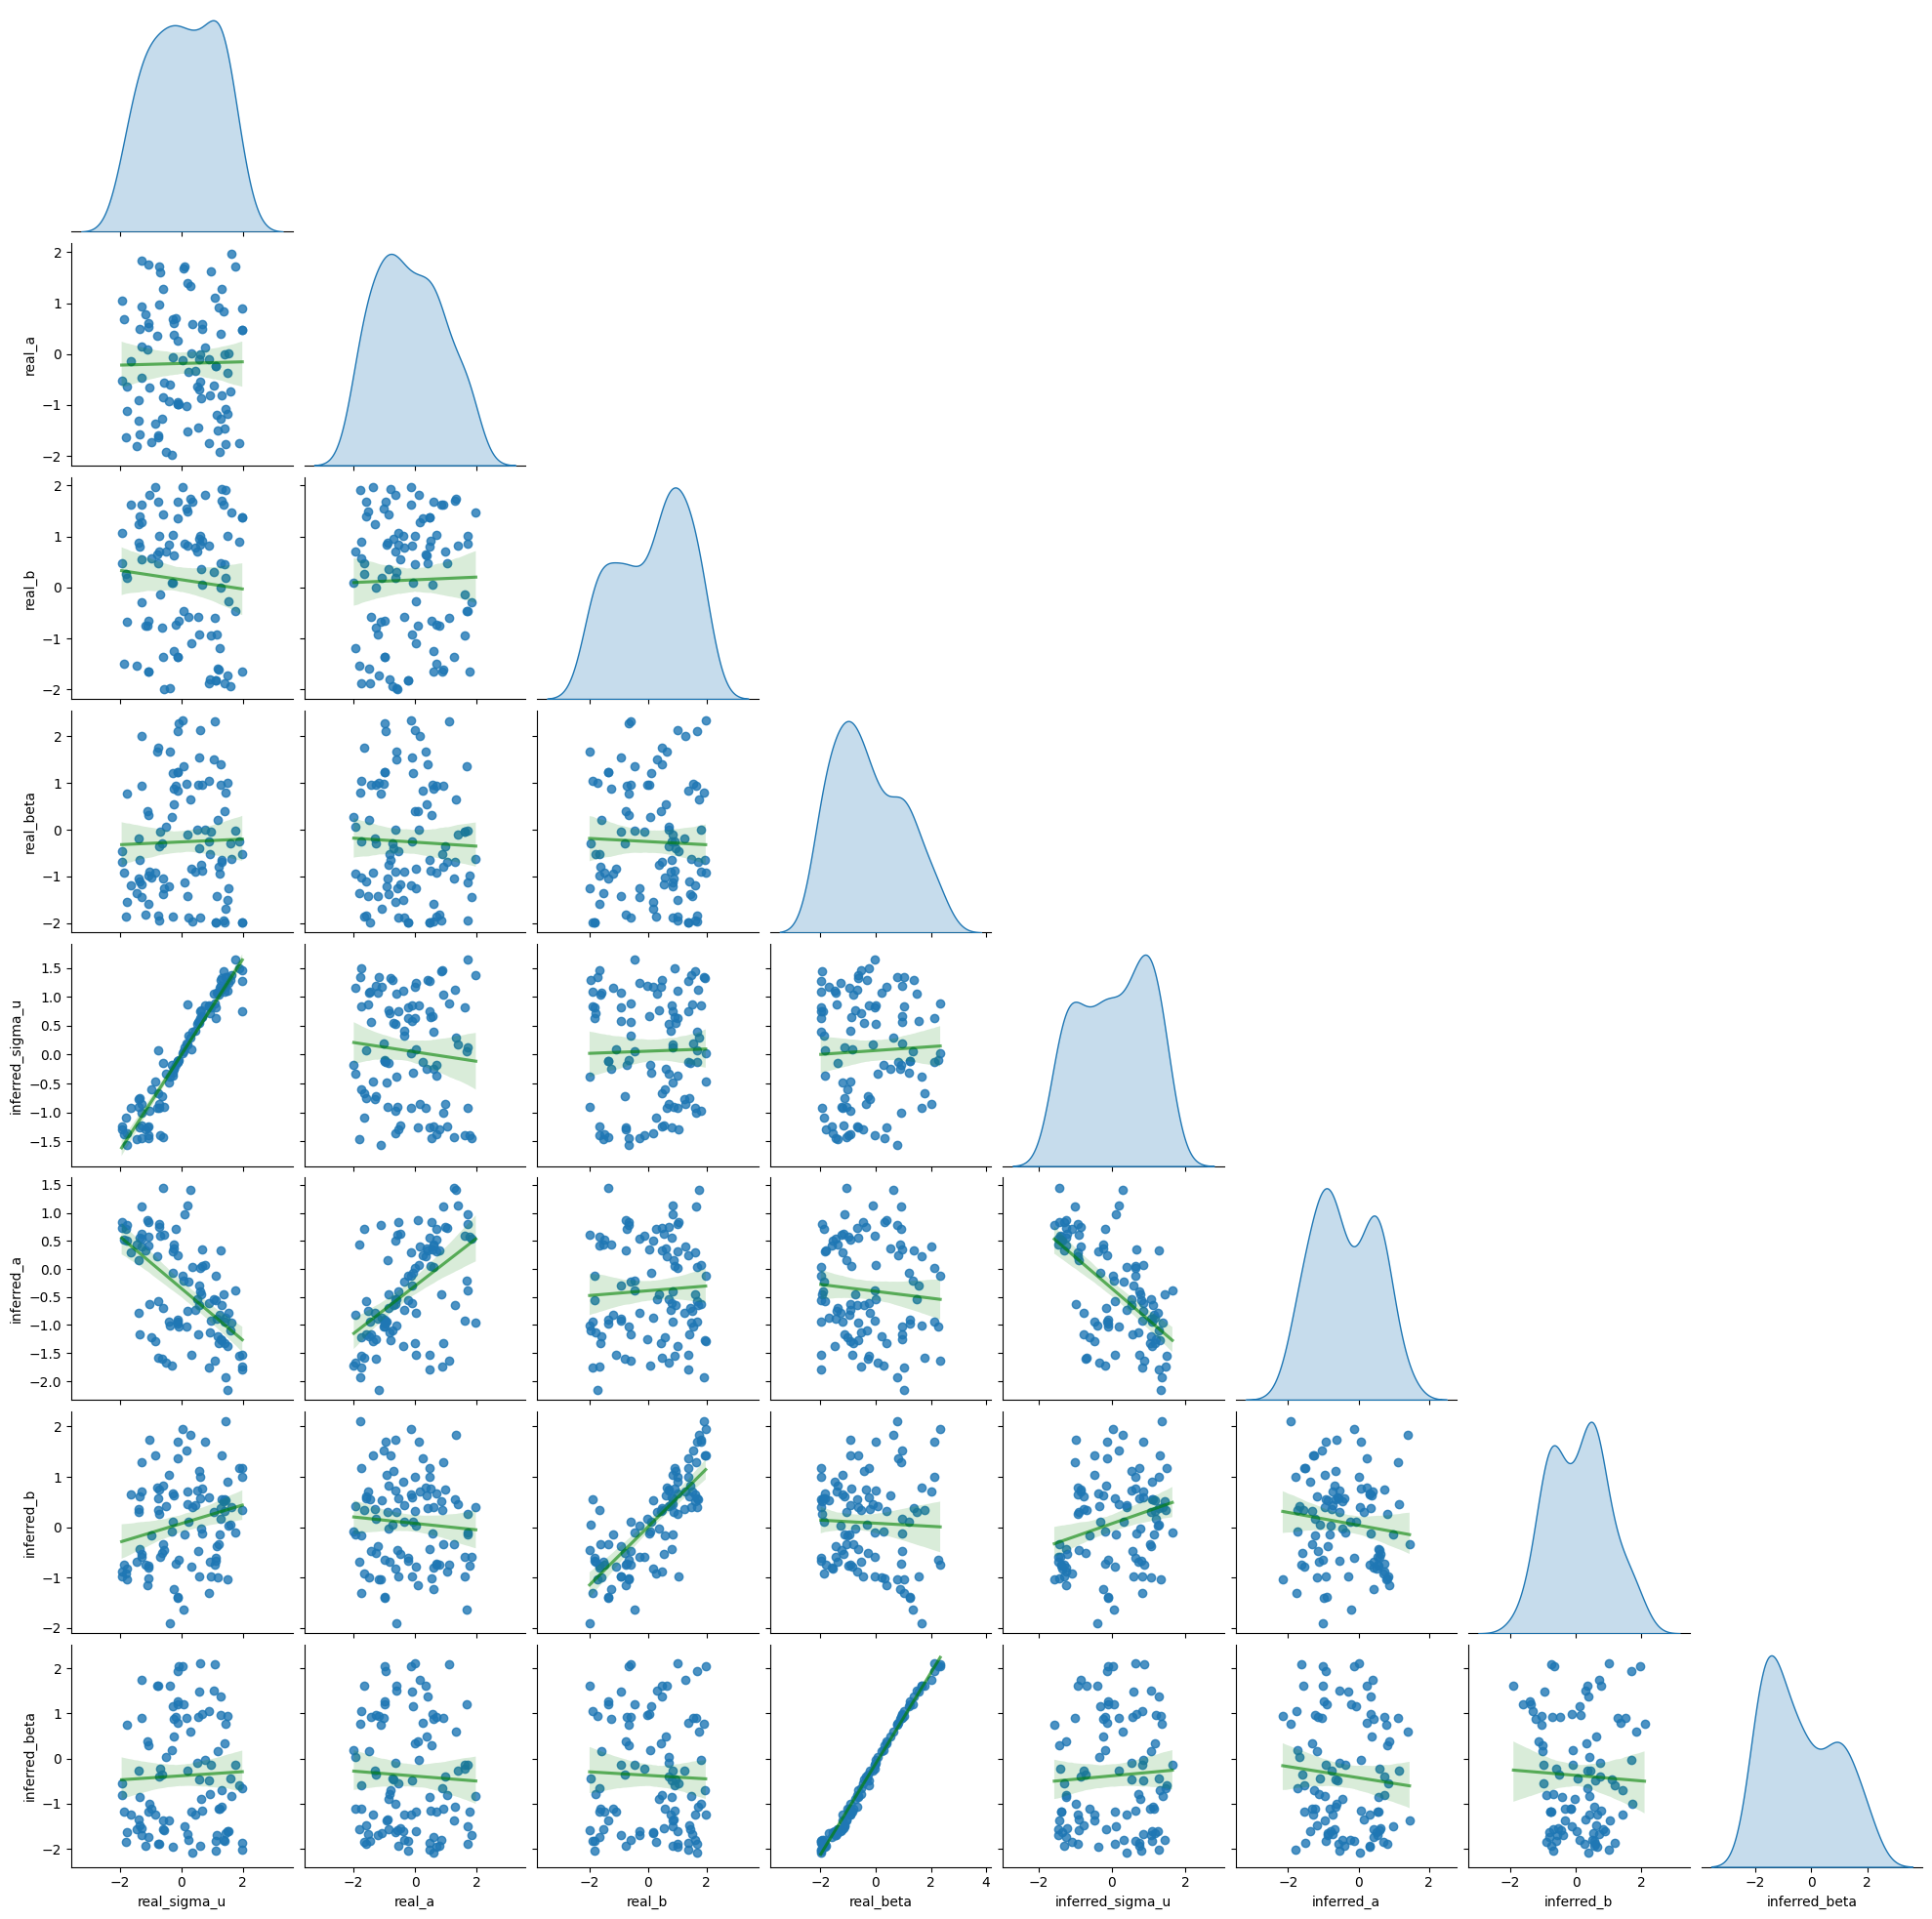

In [61]:
plt.figure()
f = sns.pairplot(data=df, kind='reg', diag_kind="kde", corner=True,
                    plot_kws={'line_kws': {'color': 'green', 'alpha': 0.6}})
# f.map(annot_corrfunc)